## Виды распределений

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random

#### Таблица цен на дома в Бостоне

Описание данных:

* CRIM: уровень преступности
* ZN: доля жилой земли (для уч-в более 25000 кв.фут.)
* INDUS: доля не розничных торговых площадей
* CHAS: "реки Чарльза" (1, если место граничит с рекой)
* NOX: концентрация в воздухе оксидов азота
* RM: среднее количество комнат в доме
* AGE: доля занятых объектов, построенных до 1940 года
* DIS: средневзвеш. расстояние до 5 центров занятости
* RAD: индекс доступности к радиальным магистралям
* TAX: налог на имущество за каждые 10 тыс.$ США
* PTRATIO: соотношение учеников и учителей в местности
* B: доля афроамериканцев (расчетная величина)
* LSTAT: процент населения низкого социального статуса
* MEDV: средняя стоимость домов в тыс.$

Загрузить таблицу.

In [2]:
url = 'http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(url, delim_whitespace=True, names=names)
data.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [3]:
# смотрим на данные на предмет пропущенных значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Построить график распределений. Найти нормальное распределение.

Иначе:

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биномиальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



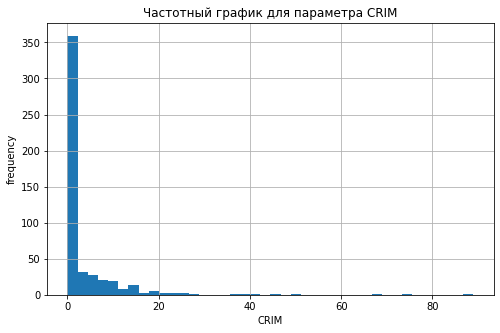

In [4]:
# частотный график для параметра CRIM

plt.figure(figsize=(8, 5))
plt.hist(data['CRIM'], bins=40)

plt.xlabel('CRIM')
plt.ylabel('frequency')

plt.title('Частотный график для параметра CRIM')
plt.grid(True)



#### Распределение похоже на экспоненциальное (непрерывные величины).

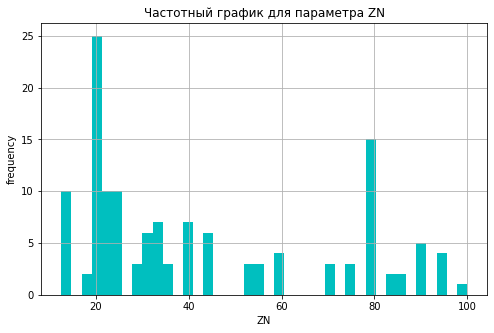

In [5]:
# частотный график для параметра ZN
# очистим от нулевых значений: их слишком много и картина распределения не ясна

plt.figure(figsize=(8, 5))

zn = data['ZN']
plt.hist(zn[zn > 0], bins=40, facecolor='c')

plt.xlabel('ZN')
plt.ylabel('frequency')

plt.title('Частотный график для параметра ZN')
plt.grid(True)

#### Это распределение дискретных величин, в целом похоже на биномиальное (если не считать выброс значения = 80).

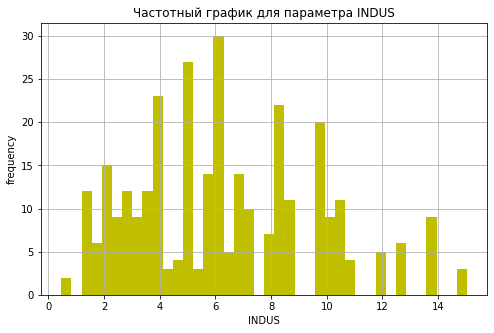

In [6]:
# частотный график для параметра INDUS
# поставим фильтр на значения < 17, т.к. далее идут выбросы: с ними распределение не понятно

plt.figure(figsize=(8, 5))

indus = data['INDUS']
plt.hist(indus[indus < 17], bins=40, facecolor='y')

plt.xlabel('INDUS')
plt.ylabel('frequency')

plt.title('Частотный график для параметра INDUS')
plt.grid(True)

#### Можно предположить, что это биномиальное распределение, дискретные величины.

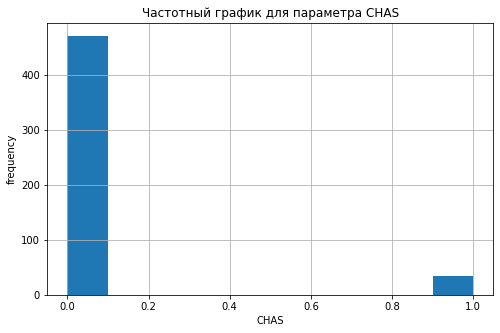

In [7]:
# частотный график для параметра CHAS

plt.figure(figsize=(8, 5))
plt.hist(data['CHAS'])

plt.xlabel('CHAS')
plt.ylabel('frequency')

plt.title('Частотный график для параметра CHAS')
plt.grid(True)

#### Это распределение Бернулли.

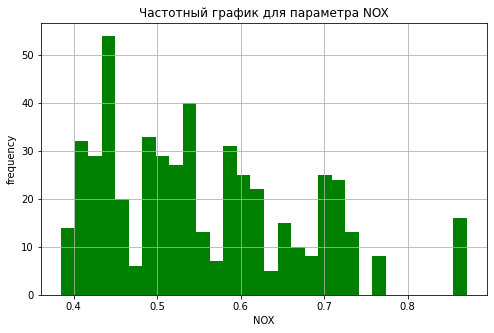

In [8]:
# частотный график для параметра NOX

plt.figure(figsize=(8, 5))
plt.hist(data['NOX'], bins=30, facecolor='g')

plt.xlabel('NOX')
plt.ylabel('frequency')

plt.title('Частотный график для параметра NOX')
plt.grid(True)

#### Данное распределение похоже на логнормальное, непрерывные величины.

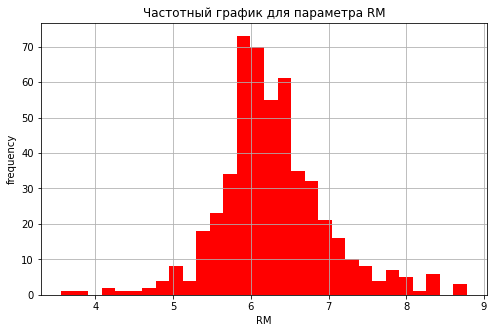

In [9]:
# частотный график для параметра RM

plt.figure(figsize=(8, 5))
plt.hist(data['RM'], bins=30, facecolor='r')

plt.xlabel('RM')
plt.ylabel('frequency')

plt.title('Частотный график для параметра RM')
plt.grid(True)

#### Распределение похоже на нормальное.

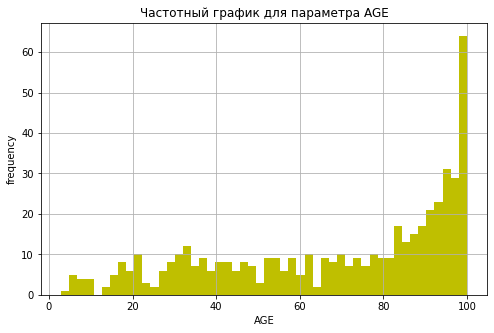

In [10]:
# частотный график для параметра AGE

plt.figure(figsize=(8, 5))
plt.hist(data['AGE'], bins=50, facecolor='y')

plt.xlabel('AGE')
plt.ylabel('frequency')

plt.title('Частотный график для параметра AGE')
plt.grid(True)

#### Похоже, что величины непрерывные и распределение экспоненциальное (график показательной функции).

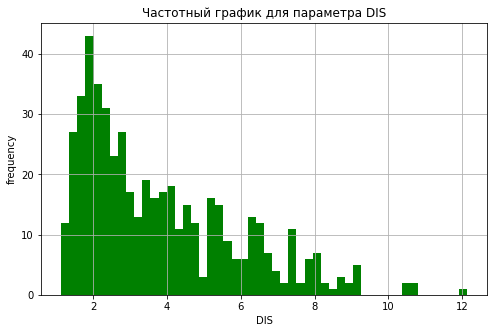

In [11]:
# частотный график для параметра DIS

plt.figure(figsize=(8, 5))
plt.hist(data['DIS'], bins=50, facecolor='g')

plt.xlabel('DIS')
plt.ylabel('frequency')

plt.title('Частотный график для параметра DIS')
plt.grid(True)

#### Это распределение логнормальное, величины непрерывные. 

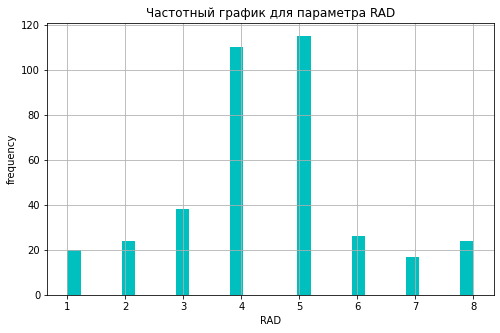

In [12]:
# частотный график для параметра RAD
# для большей наглядности уберем выброс значения > 20

plt.figure(figsize=(8, 5))

rad = data['RAD']
plt.hist(rad[rad < 20], bins=30, facecolor='c')

plt.xlabel('RAD')
plt.ylabel('frequency')

plt.title('Частотный график для параметра RAD')
plt.grid(True)

#### Это график биномиального распределения.

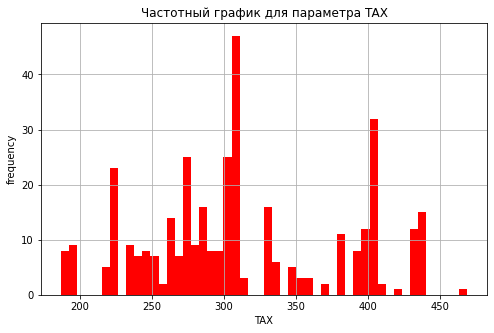

In [13]:
# частотный график для параметра TAX
# поставим фильтр на значения < 600 - уберем выбросы

plt.figure(figsize=(8, 5))

tax = data['TAX']
plt.hist(tax[tax < 600], bins=50, facecolor='r')

plt.xlabel('TAX')
plt.ylabel('frequency')

plt.title('Частотный график для параметра TAX')
plt.grid(True)

#### Больше склоняюсь к тому, что это биномиальное распределение.

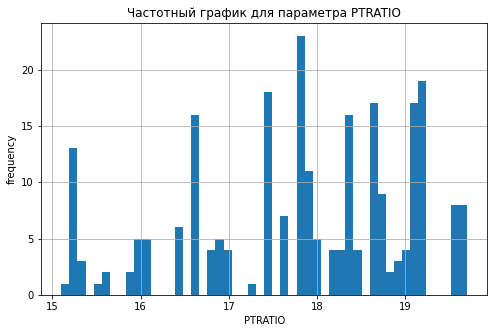

In [14]:
# частотный график для параметра PTRATIO
# для понимания распределения уберем выбросы меньше 15 & больше 20

plt.figure(figsize=(8, 5))

ptratio = data['PTRATIO']
plt.hist(ptratio[(15 < ptratio) & (ptratio < 20)], bins=50)

plt.xlabel('PTRATIO')
plt.ylabel('frequency')

plt.title('Частотный график для параметра PTRATIO')
plt.grid(True)

#### Можно предположить, что это биномиальное распределение.

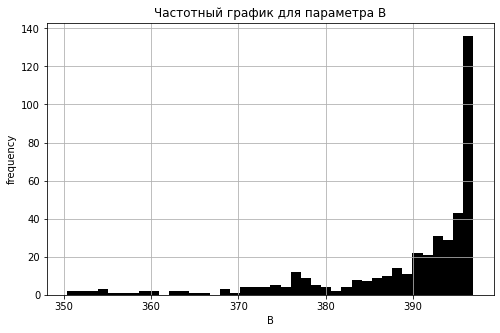

In [15]:
# частотный график для параметра B
# количество значений от 0 до 350 незначительно, уберем их

plt.figure(figsize=(8, 5))

b = data['B']
plt.hist(b[b > 350], bins=40, facecolor='black')

plt.xlabel('B')
plt.ylabel('frequency')

plt.title('Частотный график для параметра B')
plt.grid(True)

#### В данном диапазоне значения непрерывные, распределение похоже на экспоненциальное (график показательной функции).

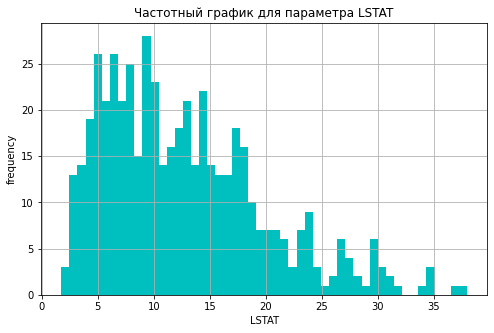

In [16]:
# частотный график для параметра LSTAT

plt.figure(figsize=(8, 5))
plt.hist(data['LSTAT'], bins=50, facecolor='c')

plt.xlabel('LSTAT')
plt.ylabel('frequency')

plt.title('Частотный график для параметра LSTAT')
plt.grid(True)

#### Распределение похоже на логнормальное, величины непрерывные.

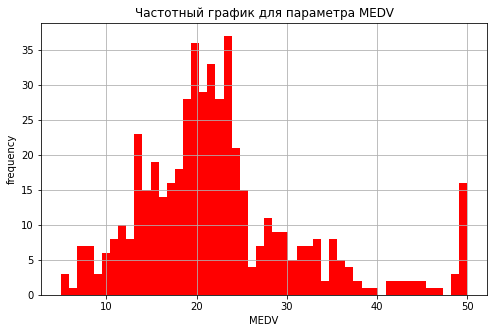

In [17]:
# частотный график для параметра MEDV

plt.figure(figsize=(8, 5))
plt.hist(data['MEDV'], bins=50, facecolor='r')

plt.xlabel('MEDV')
plt.ylabel('frequency')

plt.title('Частотный график для параметра MEDV')
plt.grid(True)

#### Распределение, скорее всего, похоже на нормальное (если не считать выброс значения = 50).

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

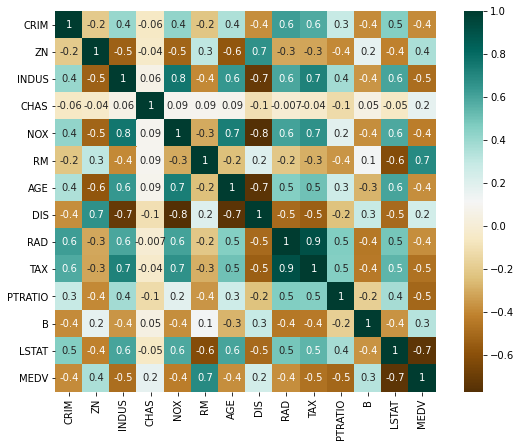

In [18]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), cmap='BrBG', annot=True, fmt='.1g', square=True)

#### С ценой на дома (MEDV) максимально коррелируют два трибута: RM (прямая зависимость) и LSTAT (обратная).

Написать **линейную регрессию** на два атрибута.

1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии


#### Предскажем цену дома по количеству комнат: атрибуты имеют линейную зависимость (коэффициент корреляции Пирсона 0,7).

In [19]:
# т.к. модель будет строиться по двум атрибутам, импорт StandardScaler не делаем: данные к одному масштабу приведем через reshape

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
rm = np.array(data['RM']).reshape(-1,1)
medv = np.array(data['MEDV']).reshape(-1,1)

In [21]:
# разделим данные на train (для обучения) и test (для проверки)
# в данной модели rm - это признак, medv - целевая переменная

X_train, X_test, y_train, y_test = train_test_split (rm, medv, test_size=0.2)

In [22]:
# обучим модель

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [23]:
# рассчитаем метрики качества:
# 1) средняя абсолютная ошибка

round(mean_absolute_error(y_test, linear.predict(X_test)), 3)

4.826

In [24]:
# 2) средняя квадратичная ошибка

round(mean_squared_error(y_test, linear.predict(X_test)), 3)

48.619

In [25]:
# 3) коэффициент детерминации - функционал качества (чем ближе к 1, тем лучше модель)

round(r2_score(y_test, linear.predict(X_test)), 3)

0.525

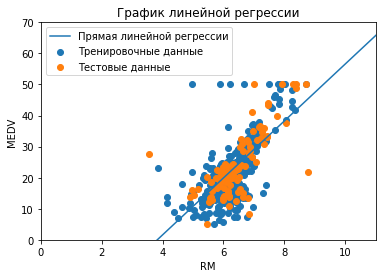

In [26]:
# построим график данных и полученную прямую линейной регрессии

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

# функция линейной регрессии: y = kx + b, где
# k = linear.coef_
# b = linear.intercept_

# создадим 50 точек для предсказаний (матрицу из 50 элементов со значениями от 0 до 70)
x = np.linspace(0, 70, 50)

y = linear.coef_ * x + linear.intercept_
y = np.transpose(y)

plt.plot(x,y)

plt.xlim(0, 11)
plt.ylim(0, 70)

plt.xlabel('RM')
plt.ylabel('MEDV')

plt.title('График линейной регрессии')
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])

#### Два атрибута - количество комнат и средняя цена дома - линейно зависят друг от друга: чем больше комнат, тем выше цена.

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [27]:
url_1 = 'http://yustiks.ru/dataset/world-happiness-report-2019.csv'
df = pd.read_csv(url_1)
df.tail(3)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
154,Central African Republic,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0
155,South Sudan,156,140,127.0,152.0,148.0,154.0,61.0,85.0,140.0,143.0


In [28]:
# смотрим на качество данных (есть ли пропущенные значения)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [29]:
# для рассчета ковариации массивы данных должны быть одинакового размера
# пропущенные значения заполним нулями

df_cov = df.fillna(0)

In [30]:
# посчитаем матрицу ковариаций попарно

df_cov[['Ladder', 'SD of Ladder']].cov()

,Ladder,SD of Ladder
Ladder,2041.00000,1100.83871
SD of Ladder,1100.83871,2041.00000


In [31]:
df_cov[['Positive affect', 'Negative affect']].cov()

,Positive affect,Negative affect
Positive affect,2041.000000,819.174194
Negative affect,819.174194,2041.000000


In [32]:
df_cov[['Social support', 'Freedom']].cov()

,Social support,Freedom
Social support,2041.000000,937.703226
Freedom,937.703226,2041.000000


In [33]:
df_cov[['Corruption', 'Generosity']].cov()

,Corruption,Generosity
Corruption,2014.593383,568.574194
Generosity,568.574194,2041.000000


In [34]:
df_cov[['Log of GDP\nper capita', 'Healthy life\nexpectancy']].cov()

,Log of GDP\nper capita,Healthy life\nexpectancy
Log of GDP\nper capita,2035.140447,1540.276923
Healthy life\nexpectancy,1540.276923,2026.603598


#### Все рассчитанные значения ковариации не равны нулю (между выбранными переменными есть взаимосвязь) и они положительны (у переменных есть тенденция меняться вместе).

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [35]:
# найдем сумму пропущенных значений в каждом из столбцов (справочно)
# в Country (region) отсутствующих данных нет

df.isna().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [36]:
# общее количество пропущенных в таблице значений

sum(df.isna().sum())

23

Сколько стран в выборке? Написать ответ. 

In [37]:
# определим количество уникальных значений

df['Country (region)'].nunique()

156

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [38]:
# уберем пропущенные значения - заменим их нулями

matrix = df.fillna(0)

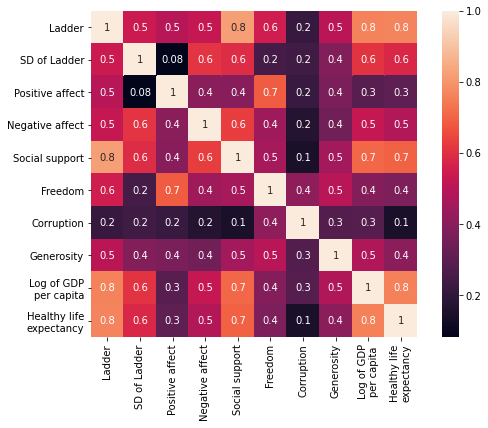

In [39]:
# построим матрицу корреляций

plt.figure(figsize=(9, 6))
sns.heatmap(matrix.corr(), annot=True, fmt='.1g', square=True)

#### Согласно расчетам на уровень удовлетворенности жизнью в значительной степени влияют социальная поддержка, показатель валового внутреннего продукта и продолжительность жизни. Показатель "коррупция" - единственный показатель, который статистически не связан с остальными.

## Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [40]:
# значения, выпадающие на гранях кубика

items = [1, 2, 3, 4, 5, 6]

In [41]:
# случайное выпадение граней кубика при 10 подбрасываниях

cube_10 = random.choices(items, k=10)
cube_10

[3, 6, 3, 5, 3, 1, 2, 3, 3, 6]

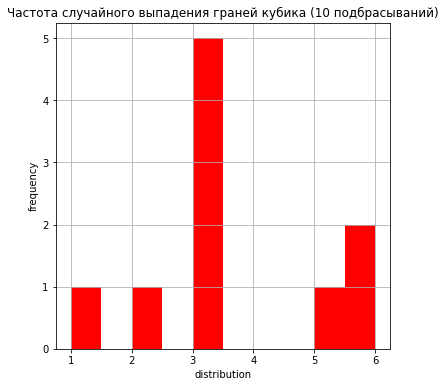

In [42]:
# строим частотный график

plt.figure(figsize=(6, 6))
plt.hist(cube_10, facecolor='r')

plt.xlabel('distribution')
plt.ylabel('frequency')

plt.title('Частота случайного выпадения граней кубика (10 подбрасываний)')
plt.grid(True)

#### Распределение похоже на биномиальное, с увеличением количества подбрасываний - приближается к равномерному.

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

In [43]:
# количество элементов в выборке
sum_ = 1000

# количество подбрасываний
number = 100

# создаем нулевой вектор из 1000 элементов,
# который заполняем средними значениями из 100 подбрасываний
cube_100 = np.zeros([sum_])

for i in range(sum_):
    cube_100[i] = np.sum(random.choices(items, k=number)) / number

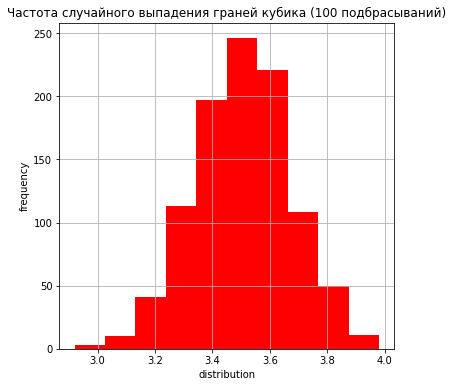

In [44]:
# строим частотный график

plt.figure(figsize=(6, 6))
plt.hist(cube_100, facecolor='r')

plt.xlabel('distribution')
plt.ylabel('frequency')

plt.title('Частота случайного выпадения граней кубика (100 подбрасываний)')
plt.grid(True)

#### Данный график построен по большому числу рассчитанных выборочных средних значений: это и определило изменение вида распределения - теперь оно близко к нормальному.

#### Т.о. подтвердили, что с ростом объема выборки распределение приближается к нормальному и происходит концентрация "псевдослучайных" величин вокруг выборочного среднего (это вывод центральной предельной теоремы).